# Fine-tune des Mobilenet_V2
---

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Model einladen aus Keras
- Weights aus den Imagnet Dataset traniert
- Erwarteten Input 224,224, 3 

In [7]:
from keras.applications.mobilenet_v2 import MobileNetV2
# 1. Lade das vortrainierte MobileNetV2 Modell mit ImageNet-Gewichten
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


### Weights und Bais des Hauptmodel werden eingeforen damit sie sich nicht verändern

Zum Basis modell werden 3 Neue sichten hinzugefügt 
- GlobalAveragePooling2D
- Dense Layer
- Dense Layer mit Sigmoid für die Binäre Klassifikation

In [19]:
# 2. Friere die Basis (MobileNetV2) ein
base_model.trainable = False

# 3. Erstelle das neue Modell, indem du zusätzliche Schichten hinzufügst
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Globales Pooling der Features
    layers.Dense(1024, activation='relu'),  # Neue Dense-Schicht
    layers.Dense(1, activation='sigmoid')  # Ausgabe-Schicht für binäre Klassifikation
])


In [20]:
# 4. Kompiliere das Modell (nur die hinzugefügten Schichten werden trainiert)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# 5. Vorbereitung der Bilddaten (Beispiel: Lade Daten aus Verzeichnissen)
train_datagen = ImageDataGenerator(rescale=1.0/255.0,  # Normalisierung
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [18]:
train_dir = r'cats_and_dogs_small\train'  # Dein Trainingsdaten-Verzeichnis
validation_dir = r'cats_and_dogs_small\validation'  # Dein Validierungsdaten-Verzeichnis

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# 6. Trainiere das Modell
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3, 3, 1)

In [ ]:






# # 7. Optional: Fine-Tune das gesamte Modell (freigeben der unteren Schichten für das Fine-Tuning)
# base_model.trainable = True
# # Wichtig: Stelle sicher, dass die Basis-Schichten nicht mit einer zu hohen Lernrate angepasst werden
# # Um Overfitting und Instabilität zu vermeiden, verwenden wir eine niedrige Lernrate
# model.compile(optimizer=Adam(learning_rate=0.00001),  # Sehr niedrige Lernrate für das Fine-Tuning
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # 8. Weiter trainieren
# history_fine_tune = model.fit(
#     train_generator,
#     epochs=10,  # Du kannst auch mehr Epochen angeben, wenn nötig
#     validation_data=validation_generator)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.8976 - loss: 0.2290

c:\Users\riandrea\Desktop\Github\SceneDetect\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 559ms/step - accuracy: 0.8981 - loss: 0.2283 - val_accuracy: 0.9580 - val_loss: 0.1519
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.9451 - loss: 0.1794 - val_accuracy: 0.9780 - val_loss: 0.0496


In [3]:
# Evaluierung des Modells auf den Validierungsdaten
eval_results = model.evaluate(validation_generator)
print(f"Loss: {eval_results[0]}")
print(f"Accuracy: {eval_results[1]}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 240ms/step - accuracy: 0.9812 - loss: 0.0444
Loss: 0.04957371577620506
Accuracy: 0.9779999852180481


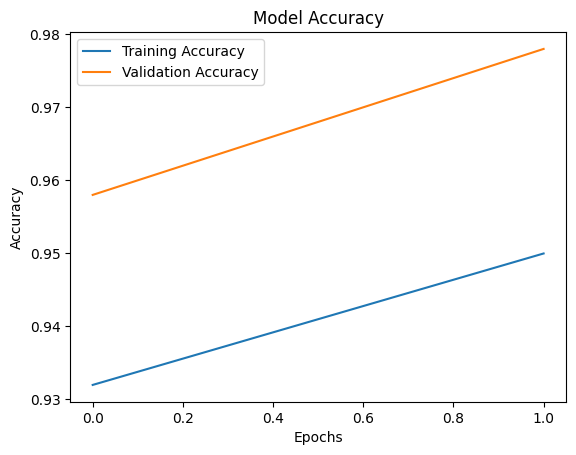

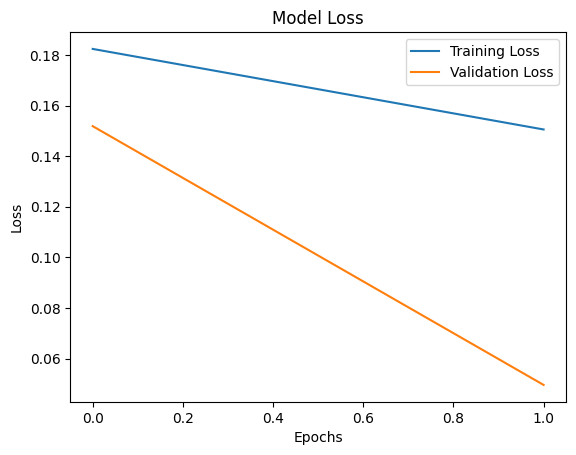

In [4]:
import matplotlib.pyplot as plt

# Beispiel für das Plotten der Trainings- und Validierungsgenauigkeit
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Beispiel für das Plotten des Trainings- und Validierungsverlusts
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
Das Bild zeigt die positive Klasse.


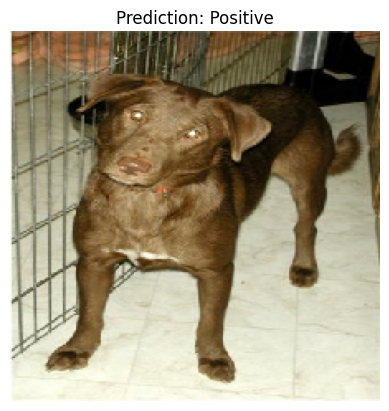

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Lade das Bild, das du testen möchtest
img_path = r'cats_and_dogs_small\train\dogs\1.jpg'  # Pfad zum Bild, das du testen möchtest

# Lade das Bild und skaliere es auf die Eingabegröße des Modells (z.B. 224x224 für MobileNetV2)
img = image.load_img(img_path, target_size=(224, 224))

# 2. Konvertiere das Bild in ein Array und normalisiere es (wie beim Training)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Füge eine Batch-Dimension hinzu
img_array /= 255.0  # Normalisiere das Bild (falls beim Training auch normalisiert wurde)

# 3. Vorhersage des Modells
predictions = model.predict(img_array)

# 4. Interpretiere die Vorhersage
# Hier nehmen wir an, dass es sich um ein binäres Klassifikationsproblem handelt
# (z.B. Hund vs. Katze)

# Bei binärer Klassifikation gibt das Modell eine Wahrscheinlichkeit zurück
# Wenn die Wahrscheinlichkeit größer als 0.5 ist, dann gehört das Bild zur positiven Klasse
if predictions[0] > 0.5:
    print("Das Bild zeigt die positive Klasse.")
else:
    print("Das Bild zeigt die negative Klasse.")

# 5. (Optional) Visualisiere das Bild
plt.imshow(img)
plt.title(f'Prediction: {"Positive" if predictions[0] > 0.5 else "Negative"}')
plt.axis('off')  # Verstecke die Achsen
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint

# Modell laden
model_path = r"model\convnet_from_scratch.keras"
model = tf.keras.models.load_model(model_path)

# Modell kompilieren
model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=1e-5),
    metrics=["accuracy"]
)

# ImageDataGenerator für das Training und die Validierung erstellen
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normiere die Pixelwerte
    rotation_range=40,  # Beispiel: Rotation für mehr Variabilität
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Lade die Trainings- und Validierungsdaten aus den Verzeichnissen
train_dir = r"cats_and_dogs_small\train"
validation_dir = r"cats_and_dogs_small\validation"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),  # Beispiel für eine Zielgröße
    batch_size=32,
    class_mode='binary'  # Da du einen binären Klassifikator verwendest (z. B. Hund/Katze)
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='binary'
)

# Modell trainieren
callbacks = [
    ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
54/63 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.4939 - loss: 1.3788

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")